#### 활성화 함수

##### sigmoid 함수

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

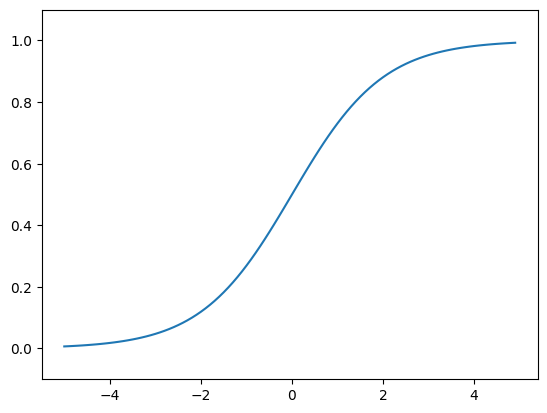

In [3]:
#그래프 그러보기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

##### Tanh 함수

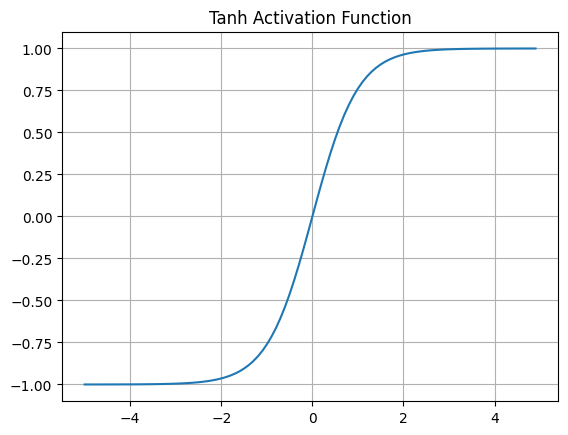

In [4]:
import numpy as np
import matplotlib.pylab as plt

def tanh(x):
    return np.tanh(x)

# 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)  # y축 범위 설정
plt.title("Tanh Activation Function")
plt.grid()
plt.show()

##### ReLU 함수 

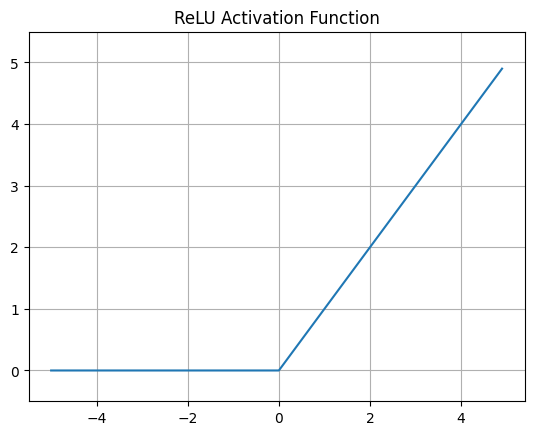

In [5]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

# 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)  # y축 범위 설정
plt.title("ReLU Activation Function")
plt.grid()
plt.show()

#### 텐서플로우(tensorflow)

##### TensorFlow를 활용한 y = 2x + 1 선형회귀 모델 예측 예제

In [6]:
### TensorFlow를 활용한 y = 2x + 1 선형회귀 모델 예측 예제 ###
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정

pd.options.display.float_format = '{:.2f}'.format

In [7]:
# 1. 데이터 준비
# x_data: 입력 데이터, y_data: 실제 값 (정답)
x_data = np.array([0, 1, 2, 3, 4], dtype=np.float32)
y_data = np.array([1, 3, 5, 7, 9], dtype=np.float32)

In [8]:
# 2. 모델 정의
# 가중치(w)와 편향(b)를 변수로 정의
w = tf.Variable(0.0)  # 초기 가중치
b = tf.Variable(0.0)  # 초기 편향

In [9]:
# 예측 함수 (y = wx + b)
def predict(x):
    return w * x + b

In [10]:
# 3. 손실 함수 정의
# 평균 제곱 오차 (Mean Squared Error, MSE) 사용
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))  # reduce_mean : 제곱한 오차들의 평균

In [11]:
# 4. 최적화 알고리즘 선택
optimizer = tf.optimizers.SGD(learning_rate=0.01)  # 확률적 경사 하강법

In [12]:
# 5. 학습 과정
for step in range(100):  # 100번 반복
    with tf.GradientTape() as tape:
        y_pred = predict(x_data)  # 예측값
        loss = loss_fn(y_data, y_pred)  # 손실 계산

    # 가중치와 편향에 대한 경사도 계산 및 업데이트
    gradients = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if step % 10 == 0:  # 10번마다 로그 출력
        print(f"Step {step}, Loss: {loss.numpy()}, w: {w.numpy()}, b: {b.numpy()}")

Step 0, Loss: 33.0, w: 0.2800000011920929, b: 0.09999999403953552
Step 10, Loss: 1.8755830526351929, w: 1.6574040651321411, b: 0.6004058718681335
Step 20, Loss: 0.1229294165968895, w: 1.9802603721618652, b: 0.7298945188522339
Step 30, Loss: 0.02239181473851204, w: 2.053251266479492, b: 0.7707916498184204
Step 40, Loss: 0.014991003088653088, w: 2.0671944618225098, b: 0.7900874018669128
Step 50, Loss: 0.013025246560573578, w: 2.0673303604125977, b: 0.8037028312683105
Step 60, Loss: 0.011540031060576439, w: 2.06437611579895, b: 0.8154456615447998
Step 70, Loss: 0.010236968286335468, w: 2.0608623027801514, b: 0.8262498378753662
Step 80, Loss: 0.009081726893782616, w: 2.0573794841766357, b: 0.8363654017448425
Step 90, Loss: 0.00805690512061119, w: 2.0540578365325928, b: 0.8458786010742188


In [13]:
# 6. 예측 및 결과 확인
print("Final Parameters:", f"w={w.numpy()}, b={b.numpy()}")
print("Prediction for x=5:", predict(5).numpy())

Final Parameters: w=2.051225423812866, b=0.8539638519287109
Prediction for x=5: 11.110091
